<a href="https://colab.research.google.com/github/HR0262/PCMCI-in-commuter-trian/blob/main/PCMCI-0427-no0-stop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tigramite
!pip install dcor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.6/309.6 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.9 MB/s eta 0:00:00


In [2]:
# Imports
import numpy as np
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import pandas as pd
import pickle
import networkx as nx

In [3]:
import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI
from tigramite.jpcmciplus import JPCMCIplus

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS
from tigramite.independence_tests.gpdc import GPDC

from tigramite.plotting import plot_time_series_graph
from tigramite.plotting import plot_graph

In [4]:
# df = pd.read_csv(r"/content/data_4041_20230427.csv", index_col=0)
df = pd.read_csv(r"/content/0427_delaymean_none_300600.csv", index_col=0)
#df.drop(columns=['Unnamed: 0'], inplace=True)
df.index.name = None
display(df)

Arlanda central  Barkarby    Bro  Bålsta  Farsta strand  Flemingsberg  \
300.0              0.0       0.0    0.0     0.0          -62.0         -32.0   
310.0            -28.0     -52.0    0.0     0.0            0.0         -32.0   
320.0              0.0       0.0  -30.0     0.0          -48.0           0.0   
330.0              0.0       0.0    0.0   -50.0          -45.0         -45.0   
340.0              0.0     -60.0    0.0     0.0            0.0          39.0   
350.0            366.0       0.0  -48.0     0.0          -76.0           0.0   
360.0              0.0     161.0    0.0   -86.0          -67.0         -32.5   
370.0              0.0     -37.0    0.0     0.0         -121.0         -50.0   
380.0            460.0     -36.0    0.0     0.0          -82.0         -54.0   
390.0              0.0       0.0    0.0   -15.0          -64.0         -38.5   
400.0             11.0     -27.5    0.0     0.0          -28.0           0.0   
410.0              0.0     -55.0  -18.0     0.0          -29.0         417.0   
420.0              0.0       0.0    0.0   -25.0          -64.0         -49.0   
430.0            -50.0     -48.0    0.0     0.0         -113.0         283.0   
440.0              0.0     -52.0  -45.0     0.0          -93.0         -34.0   
450.0              0.0       0.0    0.0   -61.0          -17.0         -52.5   
460.0            163.0     -38.5    0.0     0.0          -52.0         -45.0   
470.0              0.0       0.0  -32.0     0.0          -46.0          39.0   
480.0              0.0     188.0    0.0   -60.0           43.0          49.0   
490.0              0.0     -41.5    0.0     0.0            0.0         182.0   
500.0            324.0     -53.0    0.0     0.0          -57.0         179.0   
510.0              0.0       0.0   26.0    13.0          -43.0         -18.0   
520.0              0.0      48.0    0.0     0.0         -109.0         -18.0   
530.0            363.0     -57.0    0.0     0.0           47.0           0.0   
540.0              0.0       0.0  168.0   149.0          -81.0         -28.5   
550.0              0.0     -48.5    0.0     0.0         -106.0          18.0   
560.0            614.0     -29.0  -40.0     0.0          -66.0           0.0   
570.0              0.0       0.0    0.0   -87.0          -50.0          45.0   
580.0             37.0     -36.0    0.0     0.0          -33.0         -30.0   
590.0              0.0     -43.0    0.0     0.0          -61.0           0.0   
600.0              0.0       0.0    3.0    20.0          -41.0         -42.0   

       Gnesta  Gröndalsviken  Handen  Helenelund  ...  Tungelsta   Ulriksdal  \
300.0     0.0          -29.0     0.0       106.0  ...        0.0  -85.000000   
310.0     0.0            0.0   -53.0         0.0  ...        0.0   -7.000000   
320.0     6.0            0.0   -21.0        22.0  ...      -21.0    0.000000   
330.0     0.0           -8.0     0.0       -32.0  ...        0.0  -65.000000   
340.0     0.0            0.0   -67.0         0.0  ...        0.0  110.000000   
350.0     0.0            0.0   -50.0       142.0  ...        9.0    0.000000   
360.0     0.0          -20.0   -64.0       -38.0  ...        0.0  -83.000000   
370.0     0.0            0.0   -52.0       -42.0  ...        0.0  -90.000000   
380.0   129.0            0.0   -49.0       -32.0  ...      -38.0    0.000000   
390.0     0.0          -24.0    51.0       -46.0  ...        0.0  -74.000000   
400.0     0.0            0.0    25.0       484.5  ...        0.0  489.000000   
410.0     0.0            0.0   -17.0       -30.5  ...      -24.0  -58.000000   
420.0     0.0          -17.0   -85.0       -33.0  ...        0.0  -74.500000   
430.0     0.0            0.0   -32.0       -46.0  ...        0.0    0.000000   
440.0   -46.0            0.0   -15.0       275.5  ...      -20.0  271.500000   
450.0     0.0            0.0  -103.0         0.0  ...        0.0  309.000000   
460.0     0.0            0.0   -32.0       329.0  ...        0.0  550.000000   
470.0 

In [9]:
# df_delay = df.drop(columns=["Departure_Time"])
# df_delay = df_delay.where(df_delay >= 180, 0)
df_delay=df
df_delay.columns

Index(['Arlanda central', 'Barkarby', 'Bro', 'Bålsta', 'Farsta strand',
       'Flemingsberg', 'Gnesta', 'Gröndalsviken', 'Handen', 'Helenelund',
       'Hemfosa', 'Huddinge', 'Häggvik', 'Jakobsberg', 'Jordbro', 'Järna',
       'Kallhäll', 'Knivsta', 'Krigslida', 'Kungsängen', 'Märsta', 'Mölnbo',
       'Norrviken', 'Nynäsgård', 'Nynäshamn', 'Rosersberg', 'Rotebro',
       'Rönninge', 'Segersäng', 'Skogås', 'Sollentuna', 'Solna', 'Spånga',
       'Stockholm City', 'Stockholm Odenplan', 'Stockholms södra', 'Stuvsta',
       'Sundbyberg', 'Södertälje centrum', 'Södertälje hamn', 'Södertälje syd',
       'Trångsund', 'Tullinge', 'Tumba', 'Tungelsta', 'Ulriksdal',
       'Upplands Väsby', 'Uppsala C', 'Vega', 'Västerhaninge', 'Älvsjö',
       'Årstaberg', 'Ösmo', 'Östertälje'],
      dtype='object')

# PCMCI 用车站作为列，车次作为行 分析

分析车站之间的因果关系

In [8]:
dataframe = pp.DataFrame(data = df_delay.values, var_names = df_delay.columns)

/usr/local/lib/python3.11/dist-packages/tigramite/data_processing.py:308: UserWarning: In analysis mode 'single', 'data'.shape = (31, 54); is it of shape (observations, variables)?
  warnings.warn("In analysis mode 'single', 'data'.shape = ({}, {});"\


In [10]:
parcorr = ParCorr(significance='analytic')
robust_parcorr=RobustParCorr(significance='analytic')
gpdc = GPDC()

# 早高峰
# 筛选前后
cond_ind_test=gpdc #非线性关系
pcmci = PCMCI(
    dataframe=dataframe,
    cond_ind_test=cond_ind_test,
    verbosity=1)
tau_max = 3 #评价影响几个车次，1-10个数多少
pc_alpha = 0.05
pcmci.verbosity = 1

# results = pcmci.run_pcmciplus(tau_min=0, tau_max=tau_max, pc_alpha=pc_alpha)
results = pcmci.run_pcmci(tau_min=0, tau_max=tau_max, pc_alpha=None,alpha_level=0.05,max_conds_dim=None)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = gp_dc
tau_min = 1
tau_max = 3
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1




流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.


## Resulting lagged parent (super)sets:

    Variable Arlanda central has 8 link(s):
    [pc_alpha = 0.2]
        (Nynäsgård -2): max_pval = 0.06000, |min_val| =  0.436
        (Krigslida -2): max_pval = 0.07800, |min_val| =  0.415
        (Nynäshamn -2): max_pval = 0.10600, |min_val| =  0.400
        (Arlanda central -3): max_pval = 0.13200, |min_val| =  0.385
        (Hemfosa -3): max_pval = 0.17000, |min_val| =  0.377
        (Knivsta -2): max_pval = 0.17200, |min_val| =  0.376
        (Bro -2): max_pval = 0.17400, |min_val| =  0.376
        (Järna -1): max_pval = 0.17400, |min_val| =  0.375

    Variable Barkarby has 4 link(s):
    [pc_alpha = 0.3]
        (Skogås -3): max_pval = 0.11600, |min_val| =  0.396
        (Rosersberg -2): max_pval = 0.19800, |min_val| =  0.366
        (Sundbyberg -1): max_pval = 0.20400, |min_val| =  0.364
        (Gnesta -1): max_pval = 0.26400, |min_val| =  0.345

    Variable Bro has 7 link(s):
    [pc_alpha = 0.3]
        (Krigslida -3): max_pval = 0

流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.


## Significant links at alpha = 0.05:

    Variable Arlanda central has 33 link(s):
        (Tungelsta -3): pval = 0.00000 | val =  0.741
        (Krigslida -3): pval = 0.00200 | val =  0.706
        (Trångsund -2): pval = 0.00200 | val =  0.686
        (Jordbro -1): pval = 0.00200 | val =  0.677
        (Stockholm Odenplan -3): pval = 0.00200 | val =  0.660
        (Ösmo  0): pval = 0.00200 | val =  0.638 | unoriented link
        (Tungelsta -2): pval = 0.00400 | val =  0.627
        (Vega -3): pval = 0.00600 | val =  0.601
        (Vega  0): pval = 0.00600 | val =  0.590 | unoriented link
        (Upplands Väsby -2): pval = 0.00600 | val =  0.575
        (Mölnbo -2): pval = 0.00600 | val =  0.571
        (Norrviken  0): pval = 0.00800 | val =  0.559 | unoriented link
        (Gröndalsviken -1): pval = 0.01200 | val =  0.558
        (Krigslida -2): pval = 0.01200 | val =  0.554
        (Segersäng -3): pval = 0.01200 | val =  0.550
        (Nynäshamn -3): pval = 0.01200 | val =  0.548

p_matrix[i, j, tau]	vs val_matrix[i, j, tau]

统计检验的 p 值（显著性），条件独立性检验的 统计量（强度），❌ 越小越显著，< 0.05 常用于筛选， 用来判断是否显著、有因果边

val_matrix[i, j, tau]，条件独立性检验的 统计量（强度），✅ 越大（或绝对值大）说明依赖更强，用来排序因果边强弱

用法p < 0.05 筛选显著因果边。用 p_matrix 做初步筛选，再用 val_matrix 判断因果强度。

# p_matrix 筛选 并计数不同tau下连接数



In [28]:
print(results.keys())

p_matrix=results['p_matrix']
print('p_matrix:')
print(p_matrix.shape)
array_1d_p_matrix = p_matrix.reshape(-1)
print(array_1d_p_matrix.shape)
print(len(array_1d_p_matrix[array_1d_p_matrix<=0.05]))
graph=results['graph']
print('graph:')
print(graph.shape)
array_1d_graph = graph.reshape(-1)
print(array_1d_graph.shape)
print(len(array_1d_graph[array_1d_graph!='']))

dict_keys(['graph', 'p_matrix', 'val_matrix', 'conf_matrix'])
p_matrix:
(54, 54, 4)
(11664,)
1553
graph:
(54, 54, 4)
(11664,)
1553


对p_matrix进行筛选

后续站点不会对当前站点造成影响，当前站点的后续车次不会对当前造成影响

p_matrix[i,j,tau]<alpha_level 表示i站点在tau步前对j站点有因果影响

count数不同tau下的因果链接数量

In [29]:
train_paths = [
    ["Södertälje centrum", "Södertälje hamn", "Östertälje", "Rönninge", "Tumba",
    "Tullinge", "Flemingsberg", "Huddinge", "Stuvsta", "Älvsjö", "Årstaberg",
    "Stockholms södra", "Stockholm City", "Stockholm Odenplan", "Solna",
    "Ulriksdal", "Helenelund", "Sollentuna", "Häggvik", "Norrviken", "Rotebro",
    "Upplands Väsby", "Arlanda central", "Knivsta", "Uppsala C"],
    ["Södertälje centrum", "Södertälje hamn", "Östertälje", "Rönninge", "Tumba",
    "Tullinge", "Flemingsberg", "Huddinge", "Stuvsta", "Älvsjö", "Årstaberg",
    "Stockholms södra", "Stockholm City", "Stockholm Odenplan", "Solna",
    "Ulriksdal", "Helenelund", "Sollentuna", "Häggvik", "Norrviken", "Rotebro",
    "Upplands Väsby", "Rosersberg", "Märsta"],
    ["Nynäshamn", "Gröndalsviken", "Nynäsgård", "Ösmo", "Segersäng", "Hemfosa",
    "Tungelsta", "Krigslida", "Västerhaninge", "Jordbro", "Handen", "Vega",
    "Skogås", "Trångsund", "Farsta strand", "Älvsjö", "Årstaberg",
    "Stockholms södra", "Stockholm City", "Stockholm Odenplan", "Sundbyberg",
    "Spånga", "Barkarby", "Jakobsberg", "Kallhäll", "Kungsängen", "Bro", "Bålsta"],
    ["Södertälje centrum", "Södertälje hamn", "Södertälje syd", "Järna", "Mölnbo", "Gnesta"],
    ["Nynäshamn", "Gröndalsviken", "Nynäsgård", "Ösmo", "Segersäng", "Hemfosa",
    "Tungelsta", "Krigslida", "Västerhaninge", "Handen", "Farsta strand",
    "Älvsjö", "Årstaberg", "Stockholms södra", "Stockholm City", "Stockholm Odenplan",
    "Solna", "Ulriksdal", "Helenelund", "Sollentuna", "Häggvik", "Norrviken",
    "Rotebro", "Upplands Väsby", "Rosersberg", "Märsta"]
]
def is_later_station(train_paths, from_station, to_station):
    for path in train_paths:
        if from_station in path and to_station in path:
            if path.index(to_station) >= path.index(from_station):
                return True
    return False


p_matrix_clean = results['p_matrix'].copy()
num_vars = p_matrix_clean.shape[0]
tau_max_plus1 = p_matrix_clean.shape[2]
count = [0] * tau_max_plus1
var_names = df_delay.columns
alpha=0.05

for lag in range(tau_max_plus1):
    for i in range(num_vars):
        for j in range(num_vars):
            source = var_names[j]
            target = var_names[i]
            if not is_later_station(train_paths, source, target):
                p_matrix_clean[i,j,lag] = 1
            elif p_matrix_clean[i,j,lag]<=alpha:
                count[lag] += 1

print(count)

[115, 116, 114, 95]


# 可视化部分

边上的数字是前n个站点的延误对当前站点的因果影响

节点颜色的深浅代表auto-MCI values，表明了过去车次对站点的因果影响

边的颜色深浅代表cross-MCI values，表明了其他站点对该站点的因果影响

(<Figure size 1200x600 with 1 Axes>, <Axes: >)

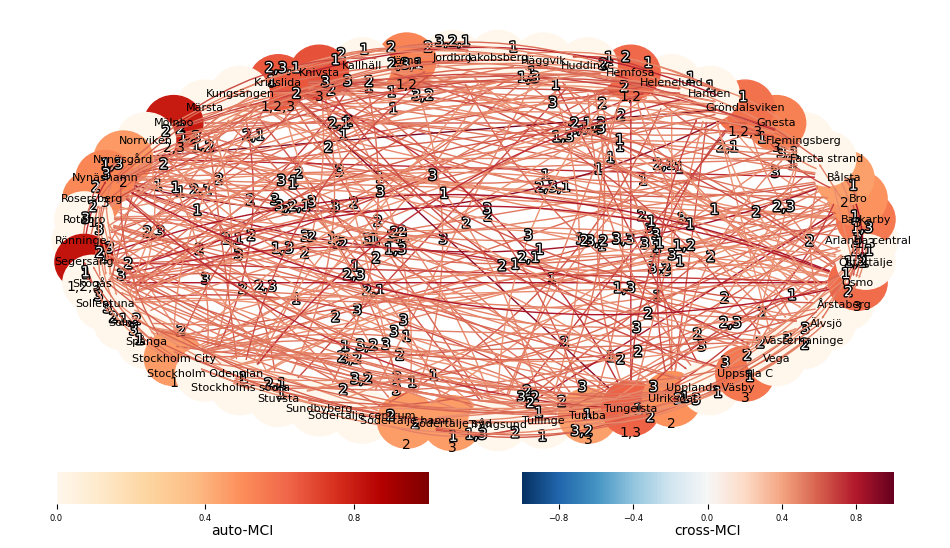

In [15]:
# 需要跟前面节点进行筛选配合，筛选p_matrix，val_matrix

# 设置显著性水平
alpha_level = 0.05

# 从 p_matrix 生成布尔型因果图
graph = pcmci.get_graph_from_pmatrix(
    p_matrix=p_matrix_clean,
    alpha_level=alpha_level,
    tau_min=0,
    tau_max=tau_max
)
# 绘图
plot_graph(
    graph=graph,
    val_matrix=results['val_matrix'],             # 测试统计值，通常是偏相关或其他统计量
    var_names=dataframe.var_names,                # 变量名称（你自己的时间序列名称）
    link_colorbar_label='cross-MCI',                # 显示边的颜色表示的含义（例如：偏相关系数）
    figsize=(12, 6),                              # 图像大小
    alpha=1.0,                                    # 图形的透明度
    arrow_linewidth=1.0,                          # 箭头的线宽
    node_size=0.3,                                # 节点大小
    curved_radius=0.2,                            # 边的弯曲度
    label_fontsize=10,                            # 标签字体大小
    node_label_size=8,                           # 节点标签字体大小
    cmap_edges='RdBu_r',                          # 边的颜色映射（红蓝渐变）
    cmap_nodes='OrRd',                            # 节点的颜色映射
    show_colorbar=True,                           # 显示颜色条
    show_autodependency_lags=True,                # 显示自依赖延迟
    vmin_edges=-1,                                # 边的颜色条范围
    vmax_edges=1.0,                               # 边的颜色条范围
    vmin_nodes=0,                                 # 节点颜色条范围
    vmax_nodes=1.0                                # 节点颜色条范围
)

(<Figure size 1200x600 with 1 Axes>, <Axes: >)

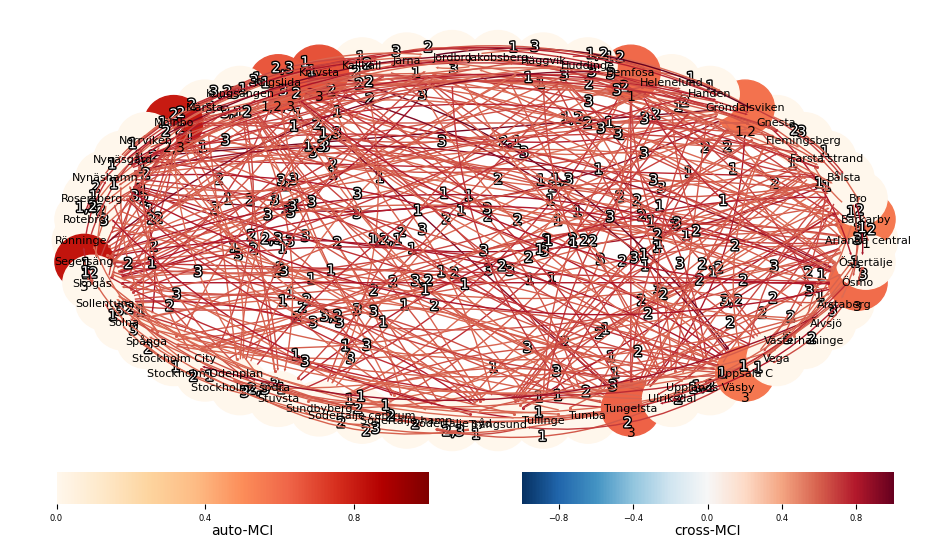

In [11]:
# 需要跟前面节点进行筛选配合，筛选p_matrix，val_matrix

# 设置显著性水平
alpha_level = 0.05

# 从 p_matrix 生成布尔型因果图
graph = pcmci.get_graph_from_pmatrix(
    p_matrix=results['p_matrix'],
    alpha_level=alpha_level,
    tau_min=0,
    tau_max=tau_max
)
# 绘图
plot_graph(
    graph=graph,
    val_matrix=results['val_matrix'],             # 测试统计值，通常是偏相关或其他统计量
    var_names=dataframe.var_names,                # 变量名称（你自己的时间序列名称）
    link_colorbar_label='cross-MCI',                # 显示边的颜色表示的含义（例如：偏相关系数）
    figsize=(12, 6),                              # 图像大小
    alpha=1.0,                                    # 图形的透明度
    arrow_linewidth=1.0,                          # 箭头的线宽
    node_size=0.3,                                # 节点大小
    curved_radius=0.2,                            # 边的弯曲度
    label_fontsize=10,                            # 标签字体大小
    node_label_size=8,                           # 节点标签字体大小
    cmap_edges='RdBu_r',                          # 边的颜色映射（红蓝渐变）
    cmap_nodes='OrRd',                            # 节点的颜色映射
    show_colorbar=True,                           # 显示颜色条
    show_autodependency_lags=True,                # 显示自依赖延迟
    vmin_edges=-1,                                # 边的颜色条范围
    vmax_edges=1.0,                               # 边的颜色条范围
    vmin_nodes=0,                                 # 节点颜色条范围
    vmax_nodes=1.0                                # 节点颜色条范围
)

# 复杂网络

440


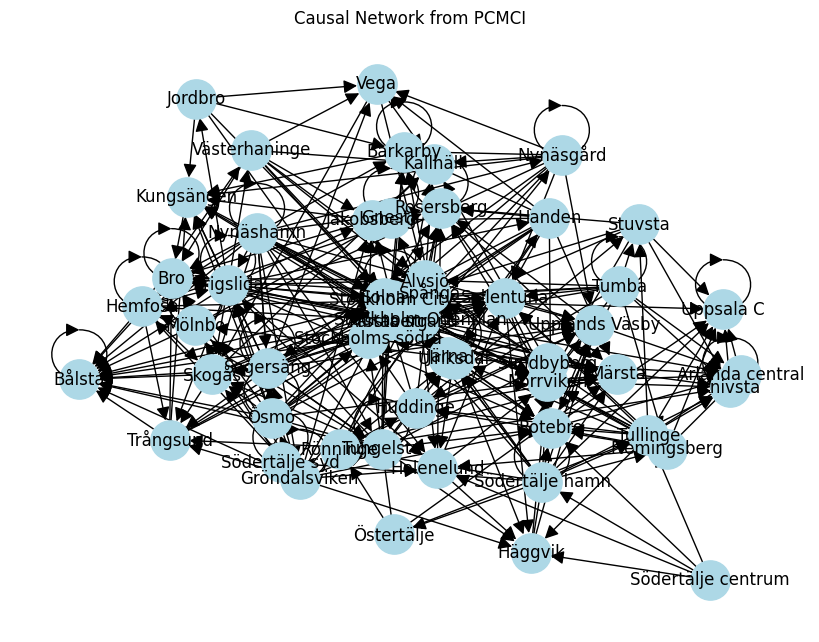

节点个数: 54
节点名称： ['Flemingsberg', 'Arlanda central', 'Norrviken', 'Rotebro', 'Stockholm Odenplan', 'Tullinge', 'Tumba', 'Ulriksdal', 'Upplands Väsby', 'Barkarby', 'Handen', 'Jordbro', 'Nynäsgård', 'Nynäshamn', 'Spånga', 'Stockholm City', 'Årstaberg', 'Bro', 'Gröndalsviken', 'Jakobsberg', 'Kungsängen', 'Sundbyberg', 'Trångsund', 'Västerhaninge', 'Älvsjö', 'Ösmo', 'Bålsta', 'Hemfosa', 'Krigslida', 'Segersäng', 'Skogås', 'Stockholms södra', 'Tungelsta', 'Farsta strand', 'Södertälje hamn', 'Gnesta', 'Järna', 'Mölnbo', 'Helenelund', 'Södertälje centrum', 'Huddinge', 'Rönninge', 'Häggvik', 'Sollentuna', 'Kallhäll', 'Vega', 'Knivsta', 'Stuvsta', 'Märsta', 'Rosersberg', 'Östertälje', 'Södertälje syd', 'Solna', 'Uppsala C']
边的个数: 332
440


In [19]:
array_1d_p_matrix_clean = p_matrix_clean.reshape(-1)
print(len(array_1d_p_matrix_clean[array_1d_p_matrix_clean<=0.05]))

# 假设变量名是按顺序排布的
variable_names = df_delay.columns  # 填入你的站点名列表
n_vars = len(variable_names)
max_lag = graph.shape[2]  # tau_max + 1

r_pmatrix=results['p_matrix']
p_matrix_clean
v_matrix=results['val_matrix']

# 创建一个有向图
G = nx.DiGraph()
c=0
# 添加因果边：从变量 j (过去时刻 t-τ) 到变量 i (当前时刻 t)
for i in range(n_vars):
    for j in range(n_vars):
        max_strength = None
        best_lag = None
        # 遍历所有 tau，寻找最大的 v_matrix 值
        for tau in range(0, max_lag):  # 从 tau=1 开始，排除同步关系
            if p_matrix_clean[i, j, tau] <= alpha_level:
                strength = v_matrix[i, j, tau]
                c += 1
                # 更新最大 strength 和对应的 lag
                if max_strength is None or strength > max_strength:
                    max_strength = strength
                    best_lag = tau
        # 如果找到显著关系，添加边
        if max_strength is not None:
            G.add_edge(variable_names[j], variable_names[i], lag=best_lag, weight=max_strength)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# pos = nx.spring_layout(G, seed=42)  # 或 nx.kamada_kawai_layout(G)
pos = nx.kamada_kawai_layout(G)

nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', arrowsize=20)
plt.title("Causal Network from PCMCI")
plt.show()

num_nodes = G.number_of_nodes()
print("节点个数:", num_nodes)
print("节点名称：", list(G.nodes()))
num_edges = G.number_of_edges()
print("边的个数:", num_edges)
print(c)

## 所有的参数

**out、in**   ----未完成：计算各种中心性

**betweenness**

closeness

pagerank

strongly_connected_components

strict_closeness

Eigenvector

**hubs**

Authorities

**Reachability**

**Cascade Potential**

Katz

综合得分

**出入度比 (Out/In)**

In [26]:
# 计算节点的入度和出度
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# 计算每个节点的入度和出度之和
degree_sum = {node: in_degrees.get(node, 0) + out_degrees.get(node, 0) for node in set(in_degrees) | set(out_degrees)}

# 按照总度数排序
top_degree_sum = sorted(degree_sum.items(), key=lambda x: x[1], reverse=True)

# 输出前5个节点
top_degree_sum[:15]

[('Krigslida', 23),
 ('Segersäng', 21),
 ('Nynäshamn', 21),
 ('Norrviken', 19),
 ('Stockholm City', 19),
 ('Ösmo', 18),
 ('Tungelsta', 18),
 ('Sollentuna', 18),
 ('Södertälje hamn', 18),
 ('Gröndalsviken', 18),
 ('Rotebro', 18),
 ('Årstaberg', 17),
 ('Bålsta', 16),
 ('Skogås', 15),
 ('Rosersberg', 15)]

In [36]:
# 计算节点的 eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=10000)

# 对中心性值进行排序，输出前五个节点及其中心性
sorted_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# 输出最大的五个
print("Top 5 nodes by Eigenvector Centrality:")
for node, centrality in sorted_centrality[:15]:
    print(f"Node {node}: {centrality}")

Top 5 nodes by Eigenvector Centrality:
Node Bålsta: 0.998604825141152
Node Uppsala C: 0.05104311515743037
Node Bro: 0.012880296820694076
Node Rosersberg: 0.0029076258069069224
Node Märsta: 0.002883348815306061
Node Knivsta: 0.0005363568734716438
Node Kungsängen: 0.0001478857113302083
Node Barkarby: 0.0001478693555686268
Node Arlanda central: 3.868185874888004e-05
Node Upplands Väsby: 2.1956449791449354e-05
Node Rotebro: 1.1022582893891246e-05
Node Norrviken: 5.540528041739628e-06
Node Häggvik: 3.017040613484069e-06
Node Sollentuna: 2.027973076973907e-06
Node Kallhäll: 1.5436456236699316e-06


In [37]:
import community
# 计算每个节点的 clustering coefficient
clustering_coeff = nx.clustering(G)
print("Clustering Coefficients:")
for node, coeff in clustering_coeff.items():
    print(f"Node {node}: {coeff}")

# 计算整个图的平均 clustering coefficient
avg_clustering = nx.average_clustering(G)
print(f"\nAverage Clustering Coefficient: {avg_clustering}")

if G.is_directed():
    G_un = G.to_undirected()
# 计算 Modularity
# 使用 Louvain 方法进行社区检测
partition = community.best_partition(G_un)

# 计算图的模块度
modularity = community.modularity(partition, G_un)
print(f"\nModularity: {modularity}")

Clustering Coefficients:
Node Flemingsberg: 0.21818181818181817
Node Arlanda central: 0.25
Node Norrviken: 0.1783625730994152
Node Rotebro: 0.17647058823529413
Node Stockholm Odenplan: 0.12637362637362637
Node Tullinge: 0.14835164835164835
Node Tumba: 0.16666666666666666
Node Ulriksdal: 0.16666666666666666
Node Upplands Väsby: 0.16483516483516483
Node Barkarby: 0.17857142857142858
Node Handen: 0.14835164835164835
Node Jordbro: 0.13333333333333333
Node Nynäsgård: 0.17424242424242425
Node Nynäshamn: 0.20175438596491227
Node Spånga: 0.1
Node Stockholm City: 0.13602941176470587
Node Årstaberg: 0.20588235294117646
Node Bro: 0.15384615384615385
Node Gröndalsviken: 0.23333333333333334
Node Jakobsberg: 0.18055555555555555
Node Kungsängen: 0.19696969696969696
Node Sundbyberg: 0.08333333333333333
Node Trångsund: 0.30303030303030304
Node Västerhaninge: 0.14444444444444443
Node Älvsjö: 0.11538461538461539
Node Ösmo: 0.23333333333333334
Node Bålsta: 0.3021978021978022
Node Hemfosa: 0.28787878787878

In [38]:
in_degrees = dict(G.in_degree())
top_in = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)[:5]

out_degrees = dict(G.out_degree())
top_out = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)[:5]

betweenness = nx.betweenness_centrality(G)
top_bet = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]

closeness = nx.closeness_centrality(G)
top_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:5]

pagerank = nx.pagerank(G)  #节点重要性
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]

# is_strongly_connected = nx.is_strongly_connected(G)
# top_strongly_connected = sorted(is_strongly_connected.items(), key=lambda x: x[1], reverse=True)[:10]

strongly_connected_components = list(nx.strongly_connected_components(G))
top_strongly_connected_components = sorted(strongly_connected_components, key=lambda x: len(x), reverse=True)[:5]

print(top_in)
print(top_out)
print(top_bet)
print(top_closeness)
print(top_pagerank)
print(top_strongly_connected_components)

[('Rotebro', 15), ('Bålsta', 15), ('Norrviken', 13), ('Stockholm City', 13), ('Bro', 13)]
[('Nynäshamn', 20), ('Gröndalsviken', 16), ('Krigslida', 16), ('Segersäng', 16), ('Södertälje hamn', 16)]
[('Stockholm City', 0.01698458773930472), ('Skogås', 0.016043508378414038), ('Norrviken', 0.015976790505092393), ('Sollentuna', 0.014124908110757164), ('Stockholm Odenplan', 0.012791964324983194)]
[('Upplands Väsby', 0.40086606866687285), ('Rosersberg', 0.3973875181422351), ('Märsta', 0.3837363805474355), ('Rotebro', 0.382654750082754), ('Norrviken', 0.37358490566037733)]
[('Uppsala C', 0.22652456858647632), ('Bålsta', 0.2190287325580608), ('Gnesta', 0.06913074347608339), ('Bro', 0.04717763738406718), ('Rosersberg', 0.04184104533859764)]
[{'Uppsala C'}, {'Arlanda central'}, {'Knivsta'}, {'Märsta'}, {'Rosersberg'}]


In [39]:
def strict_directed_closeness_centrality(G):
    closeness = {}
    N = len(G)

    for node in G.nodes:
        # 仅使用有向边计算最短路径长度
        path_lengths = nx.single_source_shortest_path_length(G, node)

        # 只考虑可达的其他节点（不包含自身）
        reachable_nodes = len(path_lengths) - 1

        if reachable_nodes > 0:
            total_distance = sum(length for target, length in path_lengths.items() if target != node)
            closeness[node] = reachable_nodes / total_distance
        else:
            # 不可达任何其他节点，closeness 为 0
            closeness[node] = 0.0

    return closeness
strict_closeness = strict_directed_closeness_centrality(G)
top_closeness_s = sorted(strict_closeness.items(), key=lambda x: x[1], reverse=True)[:10]
print(top_closeness_s)

[('Arlanda central', 1.0), ('Bro', 1.0), ('Järna', 1.0), ('Mölnbo', 1.0), ('Knivsta', 1.0), ('Rosersberg', 1.0), ('Norrviken', 0.875), ('Jakobsberg', 0.8), ('Årstaberg', 0.7368421052631579), ('Sollentuna', 0.6923076923076923)]


In [43]:
betweenness = nx.betweenness_centrality(G, normalized=True)
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
#节点的介数中心性高意味着它在其他节点之间的信息传递中处于中间位置，可能控制信息流。

# 取最大强连通子图
largest_scc = max(nx.strongly_connected_components(G), key=len)
G_scc = G.subgraph(largest_scc)
eigenvector = nx.eigenvector_centrality(G_scc, max_iter=10000)
top_eigenvector = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)[:5]

hubs, authorities = nx.hits(G, max_iter=1000, normalized=True)
top_hubs = sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:5]
top_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:5]
#节点的 hubs 中心性越高，表示它与很多其他节点有连接，并且可能在信息传播中起到重要作用。
#节点的 authorities 中心性越高，表示它接收了来自其他节点的很多连接，可能是信息的接收点。

reachability = {}
for node in G.nodes:
    reachable = nx.descendants(G, node)  # 方向性！从 node 出发能到达谁
    reachability[node] = len(reachable)
top_reachability = sorted(reachability.items(), key=lambda x: x[1], reverse=True)[:5]
#节点的可达性越高，表示它可以影响到更多的节点，可能是一个信息源或传播中心。


largest_scc = max(nx.strongly_connected_components(G), key=len)
subgraph = G.subgraph(largest_scc)
avg_path_length = nx.average_shortest_path_length(subgraph)
print(f"Average Path Length (on largest strongly connected component): {avg_path_length:.3f}")
#是图中节点之间的平均最短路径长度。这里计算的是 最大强连通分量（SCC）中的节点对之间的平均最短路径长度。值 1.167 表示在最大强连通分量中，节点间的平均路径长度为 1.167 步。

cascade_potential = {}
for node in G.nodes:
    cascade_potential[node] = len(nx.descendants(G, node))
top_cascade = sorted(cascade_potential.items(), key=lambda x: x[1], reverse=True)[:5]
#节点的 cascade potential 越高，表示它有更大的潜力在网络中引发信息传播


def print_top(title, data):
    print(f"\nTop 5 {title}:")
    for node, value in data:
        print(f"Node {node}: {value:.4f}")

print_top("Betweenness", top_betweenness)
print_top("Eigenvector", top_eigenvector)
print_top("Hubs", top_hubs)
print_top("Authorities", top_authorities)
print_top("Reachability", top_reachability)
print_top("Cascade Potential", top_cascade)

Average Path Length (on largest strongly connected component): 0.000

Top 5 Betweenness:
Node Stockholm City: 0.0170
Node Skogås: 0.0160
Node Norrviken: 0.0160
Node Sollentuna: 0.0141
Node Stockholm Odenplan: 0.0128

Top 5 Eigenvector:
Node Uppsala C: 1.0000

Top 5 Hubs:
Node Nynäshamn: 0.0780
Node Ösmo: 0.0666
Node Gröndalsviken: 0.0652
Node Segersäng: 0.0612
Node Krigslida: 0.0553

Top 5 Authorities:
Node Bålsta: 0.0644
Node Krigslida: 0.0461
Node Skogås: 0.0423
Node Tungelsta: 0.0397
Node Stockholm City: 0.0396

Top 5 Reachability:
Node Nynäshamn: 40.0000
Node Gröndalsviken: 39.0000
Node Nynäsgård: 37.0000
Node Ösmo: 37.0000
Node Segersäng: 36.0000

Top 5 Cascade Potential:
Node Nynäshamn: 40.0000
Node Gröndalsviken: 39.0000
Node Nynäsgård: 37.0000
Node Ösmo: 37.0000
Node Segersäng: 36.0000


In [44]:
# Katz Centrality（可调 alpha）
katz = nx.katz_centrality_numpy(G, alpha=0.01, beta=1.0)
# Katz Centrality（带衰减的路径传播）
# 衡量节点影响整个图中其他节点的能力（考虑路径长度和数量）每个节点的得分取决于它所有“路径到其他节点”的总权重，路径越长，贡献越小（指数衰减）。

# 反向图：用于评估主动传播力
G_reversed = G.reverse()
pagerank_influence = nx.pagerank(G_reversed)

# HITS 权威度（原图）：受影响力
_, authority = nx.hits(G)

# 综合评分：0.5 * 主动影响力（反向PageRank）+ 0.5 * 被动影响力（Authority）
# PageRank（反向图）：衡量该节点影响了多少下游节点 → 传播能力；
# Authority：衡量该节点被多少强影响者“指向” → 被影响程度；
# 值高 → 既是“传播源”又是“枢纽站”（如大型换乘站、核心节点）
combined_score = {
    node: 0.5 * pagerank_influence.get(node, 0) + 0.5 * authority.get(node, 0)
    for node in G.nodes()
}

# 出入度比（用于分析传播倾向）
# 表示一个节点是更像传播者（>1）还是接受者（<1）
centrality_ratio = {
    node: (G.out_degree(node) + 1) / (G.in_degree(node) + 1)
    for node in G.nodes()
}

# 输出格式化后的结果（按综合评分降序）
result = {
    node: {
        "Katz": katz[node],
        "CombinedScore": combined_score[node],
        "OutInRatio": centrality_ratio[node]
    }
    for node in G.nodes()
}

# 排序输出
sorted_result = sorted(result.items(), key=lambda x: x[1]["Katz"], reverse=True)

print("节点\tKatz\t\t综合得分\t\t出入度比 (Out/In)")
for node, values in sorted_result:
    print(f"{node}\t{values['Katz']:.4f}\t\t{values['CombinedScore']:.4f}\t\t{values['OutInRatio']:.2f}")

节点	Katz		综合得分		出入度比 (Out/In)
Bålsta	0.1482		0.0339		0.12
Rotebro	0.1480		0.0198		0.25
Rosersberg	0.1457		0.0134		0.21
Bro	0.1453		0.0184		0.21
Norrviken	0.1453		0.0160		0.50
Sollentuna	0.1452		0.0207		0.43
Stockholm City	0.1450		0.0225		0.50
Upplands Väsby	0.1442		0.0126		0.23
Märsta	0.1426		0.0097		0.08
Kungsängen	0.1426		0.0182		0.17
Solna	0.1409		0.0191		0.36
Uppsala C	0.1401		0.0067		0.20
Älvsjö	0.1397		0.0132		0.50
Arlanda central	0.1388		0.0075		0.22
Kallhäll	0.1385		0.0078		0.11
Barkarby	0.1385		0.0113		0.33
Knivsta	0.1384		0.0082		0.33
Årstaberg	0.1384		0.0211		1.11
Ulriksdal	0.1384		0.0148		0.78
Skogås	0.1384		0.0247		0.89
Häggvik	0.1372		0.0113		0.50
Farsta strand	0.1371		0.0162		1.00
Krigslida	0.1370		0.0354		2.12
Helenelund	0.1370		0.0149		0.62
Stockholm Odenplan	0.1370		0.0125		1.00
Trångsund	0.1358		0.0177		1.00
Jakobsberg	0.1358		0.0113		0.57
Tungelsta	0.1357		0.0309		1.86
Segersäng	0.1343		0.0296		2.83
Vega	0.1343		0.0096		0.67
Stockholms södra	0.1343		0.0082		1.00
Spån

寻找val最大的因果边，看传播路径

threshold？

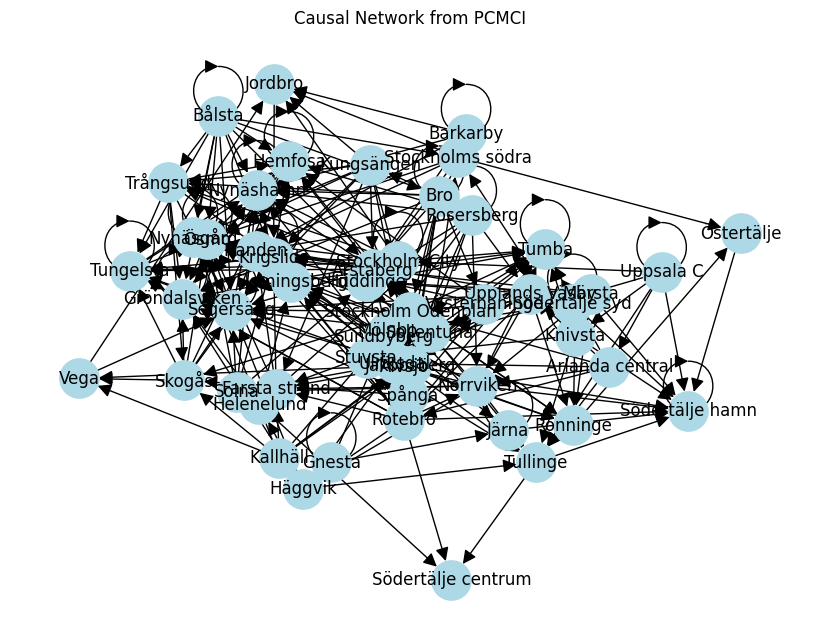

节点个数: 54
节点名称： ['Arlanda central', 'Norrviken', 'Rotebro', 'Stockholm Odenplan', 'Tullinge', 'Tumba', 'Ulriksdal', 'Upplands Väsby', 'Barkarby', 'Handen', 'Jordbro', 'Nynäshamn', 'Årstaberg', 'Bro', 'Gröndalsviken', 'Jakobsberg', 'Kungsängen', 'Spånga', 'Sundbyberg', 'Trångsund', 'Västerhaninge', 'Älvsjö', 'Bålsta', 'Hemfosa', 'Krigslida', 'Nynäsgård', 'Segersäng', 'Stockholms södra', 'Tungelsta', 'Ösmo', 'Farsta strand', 'Flemingsberg', 'Gnesta', 'Järna', 'Mölnbo', 'Helenelund', 'Södertälje centrum', 'Huddinge', 'Rönninge', 'Häggvik', 'Stockholm City', 'Södertälje hamn', 'Kallhäll', 'Skogås', 'Vega', 'Knivsta', 'Stuvsta', 'Märsta', 'Södertälje syd', 'Solna', 'Rosersberg', 'Sollentuna', 'Östertälje', 'Uppsala C']


In [46]:
num_vars = p_matrix_clean.shape[0]
tau_max_plus1 = p_matrix_clean.shape[2]
alpha_level=0.05
v_matrix=results['val_matrix']

Gmax = nx.DiGraph()

for i in range(num_vars):       # target
    v_max=0
    imax,jmax,taumax=0,0,0
    for j in range(num_vars):   # source
        for tau in range(1,tau_max_plus1):

            if p_matrix_clean[i, j, tau]<=alpha_level :
              Gmax.add_edge(variable_names[i], variable_names[j], lag=tau) #tau!=0的因果链
              if v_matrix[i, j, tau]>v_max:
                v_max=v_matrix[i, j, tau]
                imax=i
                jmax=j
                taumax=tau
    # if imax!=0 or jmax!=0 or taumax!=0:
    #   Gmax.add_edge(variable_names[imax], variable_names[jmax], lag=taumax)
    #生成val最强的传播路径，但是就是4-5-6-7-8---，看不出任何含义

plt.figure(figsize=(8, 6))
pos = nx.kamada_kawai_layout(Gmax)

nx.draw(Gmax, pos, with_labels=True, node_size=800, node_color='lightblue', arrowsize=20)
plt.title("Causal Network from PCMCI")
plt.show()

num_nodes = Gmax.number_of_nodes()
print("节点个数:", num_nodes)
print("节点名称：", list(Gmax.nodes()))

1. Diameter（直径）
定义：网络中最短路径的最大值，即：从一个节点能到达的最远节点的“最短路径长度”。但仅限于强连通子图（strongly connected component）
2. Link Density（连接密度）
定义：网络中实际存在的边数 / 所有可能存在的边数。
有向图中最大边数是n(n−1)。站点之间存在因果关系的紧密程度。
3. Assortativity（同配性）
定义：度同配性系数。衡量连接的节点是否倾向于有相似度（比如高度节点连高度节点）。可以分析入度或出度的相关性.代表含义：高因果影响节点是否倾向于彼此连接。
4. Network Efficiency（网络效率）
定义：网络中所有成对节点的平均“信息传递效率”，即平均路径长度的倒数。代表延误因果传播是否“快速”。
5. Community Detection（社区结构）
定义：将网络划分成若干个“紧密连接”的子群体（社区）。在弱连通或传播性较强的图中有价值。一组站点在传播链中彼此关系紧密（可能是子线路或站点组）
6. Network Motifs（网络模体）
定义：网络中出现频率远高于随机网络的微结构子图（如三角形、链式三元组等）。
适用于你：是，非常适用于因果图，可以找出常见传播结构（如 A→B→C）。最常见的传播模式结构。

In [47]:
# 获取最大强连通子图
largest_scc = max(nx.strongly_connected_components(G), key=len)
G_scc = G.subgraph(largest_scc)

diameter = nx.diameter(G_scc)
print(f"Diameter: {diameter}")

n = G.number_of_nodes()
m = G.number_of_edges()
density = m / (n * (n - 1))
print(f"Link Density: {density:.4f}")

assortativity = nx.degree_assortativity_coefficient(G, x='out', y='out')
print(f"Assortativity (out-degree): {assortativity:.4f}")

efficiency = nx.global_efficiency(G.to_undirected())  # 或 largest_scc.to_undirected()
print(f"Global Efficiency: {efficiency:.4f}")

from networkx.algorithms.community import greedy_modularity_communities

communities = greedy_modularity_communities(G.to_undirected())
for i, c in enumerate(communities):
    print(f"Community {i}: {sorted(c)}")

triads = nx.triadic_census(G)  # 只适用于有向图且至少3个节点
print(triads)

Diameter: 0
Link Density: 0.1160
Assortativity (out-degree): 0.4352
Global Efficiency: 0.5635
Community 0: ['Barkarby', 'Bro', 'Bålsta', 'Farsta strand', 'Gröndalsviken', 'Handen', 'Hemfosa', 'Jakobsberg', 'Jordbro', 'Kallhäll', 'Krigslida', 'Kungsängen', 'Nynäsgård', 'Nynäshamn', 'Segersäng', 'Skogås', 'Spånga', 'Stockholm City', 'Sundbyberg', 'Trångsund', 'Tungelsta', 'Vega', 'Västerhaninge', 'Älvsjö', 'Årstaberg', 'Ösmo']
Community 1: ['Arlanda central', 'Flemingsberg', 'Helenelund', 'Huddinge', 'Häggvik', 'Knivsta', 'Märsta', 'Norrviken', 'Rosersberg', 'Rotebro', 'Rönninge', 'Sollentuna', 'Solna', 'Stockholm Odenplan', 'Stockholms södra', 'Stuvsta', 'Södertälje centrum', 'Södertälje hamn', 'Tullinge', 'Tumba', 'Ulriksdal', 'Upplands Väsby', 'Uppsala C', 'Östertälje']
Community 2: ['Gnesta', 'Järna', 'Mölnbo', 'Södertälje syd']
{'003': 12040, '012': 9885, '102': 0, '021D': 871, '021U': 727, '021C': 804, '111D': 0, '111U': 0, '030T': 477, '030C': 0, '201': 0, '120D': 0, '120U': 0, '1

影响（out）受影响（in）的val值和排序

In [48]:
import networkx as nx
from heapq import heappush, heappushpop, nlargest
from collections import Counter

def top_k_paths_of_length(G, path_length=3, k=5):
    top_paths = []

    def dfs(path, total_weight):
        if len(path) == path_length + 1:
            # 满足长度要求，尝试加入前k个最大路径中
            if len(top_paths) < k:
                heappush(top_paths, (total_weight, path.copy()))
            else:
                heappushpop(top_paths, (total_weight, path.copy()))
            return

        last_node = path[-1]
        for neighbor in G.successors(last_node):
            # 如果不允许重复节点，可启用以下检查
            # if neighbor in path:
            #     continue
            edge_data = G.get_edge_data(last_node, neighbor)
            if edge_data is None or 'weight' not in edge_data:
                continue
            dfs(path + [neighbor], total_weight + edge_data['weight'])

    for start_node in G.nodes():
        dfs([start_node], 0)

    return nlargest(k, top_paths)

# 获取 v-value 最高的 30 条路径（路径长度为 4）
top30 = top_k_paths_of_length(G, path_length=4, k=30)

# 统计所有路径中站点的出现频率
node_counts = Counter()
for weight, path in top30:
    node_counts.update(path)  # 统计路径中每个站点的出现次数

# 获取出现频率最高的 5 个站点
top5_nodes = node_counts.most_common(18)

# 输出结果
print("Top 5 most frequent nodes in the top 30 paths:")
for node, count in top5_nodes:
    print(f"Node: {node}, Frequency: {count}")

# 可选：输出 top 30 路径以便检查
print("\nTop 30 paths for reference:")
for weight, path in top30:
    print(f"Path: {path}, Total Weight: {weight}")

Top 5 most frequent nodes in the top 30 paths:
Node: Segersäng, Frequency: 44
Node: Gröndalsviken, Frequency: 26
Node: Nynäsgård, Frequency: 23
Node: Nynäshamn, Frequency: 21
Node: Mölnbo, Frequency: 5
Node: Krigslida, Frequency: 5
Node: Skogås, Frequency: 4
Node: Tungelsta, Frequency: 4
Node: Ösmo, Frequency: 3
Node: Sollentuna, Frequency: 2
Node: Bålsta, Frequency: 2
Node: Årstaberg, Frequency: 2
Node: Hemfosa, Frequency: 2
Node: Vega, Frequency: 2
Node: Trångsund, Frequency: 1
Node: Stockholm Odenplan, Frequency: 1
Node: Häggvik, Frequency: 1
Node: Solna, Frequency: 1

Top 30 paths for reference:
Path: ['Nynäshamn', 'Gröndalsviken', 'Nynäsgård', 'Segersäng', 'Segersäng'], Total Weight: 3.4076801182343743
Path: ['Gröndalsviken', 'Nynäsgård', 'Segersäng', 'Segersäng', 'Segersäng'], Total Weight: 3.333458374017697
Path: ['Ösmo', 'Segersäng', 'Segersäng', 'Segersäng', 'Segersäng'], Total Weight: 3.2900293656121677
Path: ['Segersäng', 'Segersäng', 'Segersäng', 'Segersäng', 'Segersäng'], 

In [49]:
import networkx as nx
from heapq import heappush, heappushpop, nlargest
from collections import Counter

def top_k_paths_of_length(G, path_length=3, k=5):
    top_paths = []

    def dfs(path, total_weight):
        if len(path) == path_length + 1:
            # 满足长度要求，尝试加入前k个最大路径中
            if len(top_paths) < k:
                heappush(top_paths, (total_weight, path.copy()))
            else:
                heappushpop(top_paths, (total_weight, path.copy()))
            return

        last_node = path[-1]
        for neighbor in G.successors(last_node):
            # 如果不允许重复节点，可启用以下检查
            # if neighbor in path:
            #     continue
            edge_data = G.get_edge_data(last_node, neighbor)
            if edge_data is None or 'weight' not in edge_data:
                continue
            dfs(path + [neighbor], total_weight + edge_data['weight'])

    for start_node in G.nodes():
        dfs([start_node], 0)

    return nlargest(k, top_paths)

# 获取 v-value 最高的 30 条路径（路径长度为 4）
top30 = top_k_paths_of_length(G, path_length=4, k=30)

# 统计所有路径中从第二站到第三站的子路径（边）的频率
subpath_counts = Counter()
for weight, path in top30:
    if len(path) >= 3:  # 确保路径有足够的节点
        subpath0 = (path[0], path[1])
        subpath1 = (path[1], path[2])  # 提取第二站到第三站的边
        subpath2 = (path[2], path[3])
        subpath_counts[subpath0] += 1
        subpath_counts[subpath1] += 1
        subpath_counts[subpath2] += 1

# 获取频率最高的 5 个子路径
top5_subpaths = subpath_counts.most_common(10)

# 输出结果
print("Top 5 most frequent subpaths (from 2nd to 3rd node) in the top 30 paths:")
for (node1, node2), count in top5_subpaths:
    print(f"Edge: {node1} -> {node2}, Frequency: {count}")

# 可选：输出 top 30 路径以便检查
print("\nTop 30 paths for reference:")
for weight, path in top30:
    print(f"Path: {path}, Total Weight: {weight}")

Top 5 most frequent subpaths (from 2nd to 3rd node) in the top 30 paths:
Edge: Gröndalsviken -> Nynäsgård, Frequency: 22
Edge: Nynäshamn -> Gröndalsviken, Frequency: 19
Edge: Nynäsgård -> Segersäng, Frequency: 19
Edge: Segersäng -> Segersäng, Frequency: 14
Edge: Ösmo -> Segersäng, Frequency: 3
Edge: Mölnbo -> Mölnbo, Frequency: 3
Edge: Gröndalsviken -> Gröndalsviken, Frequency: 2
Edge: Nynäshamn -> Ösmo, Frequency: 1
Edge: Gröndalsviken -> Tungelsta, Frequency: 1
Edge: Tungelsta -> Krigslida, Frequency: 1

Top 30 paths for reference:
Path: ['Nynäshamn', 'Gröndalsviken', 'Nynäsgård', 'Segersäng', 'Segersäng'], Total Weight: 3.4076801182343743
Path: ['Gröndalsviken', 'Nynäsgård', 'Segersäng', 'Segersäng', 'Segersäng'], Total Weight: 3.333458374017697
Path: ['Ösmo', 'Segersäng', 'Segersäng', 'Segersäng', 'Segersäng'], Total Weight: 3.2900293656121677
Path: ['Segersäng', 'Segersäng', 'Segersäng', 'Segersäng', 'Segersäng'], Total Weight: 3.2888588278369673
Path: ['Nynäshamn', 'Ösmo', 'Seger

In [50]:
# 遍历所有 target, source, tau 组合
num_vars = p_matrix_clean.shape[0]
tau_max_plus1 = p_matrix_clean.shape[2]
alpha_level=0.05
v_matrix=results['val_matrix']
ki=[0]*num_vars
kj=[0]*num_vars

for i in range(num_vars):       # target
    for j in range(num_vars):   # source
        for tau in range(tau_max_plus1):
            if p_matrix_clean[i, j, tau]<=alpha_level:
              ki[i]+=v_matrix[i, j, tau]  # k[i]为影响别人 k[j]为受影响
              kj[j]+=v_matrix[i, j, tau]

k = [x + y for x, y in zip(ki, kj)]
# 整合为 DataFrame
df_k = pd.DataFrame({
    'station': df_delay.columns,
    'influence_received': ki
})

# 按影响值降序排序
df_k_sorted = df_k.sort_values(by='influence_received', ascending=False).reset_index(drop=True)

# 输出结果
print(df_k_sorted)

               station  influence_received
0               Bålsta           14.075735
1                  Bro           11.157629
2            Krigslida           11.073563
3           Kungsängen            9.013594
4              Rotebro            8.965065
5            Norrviken            8.039188
6       Upplands Väsby            8.026184
7               Skogås            7.694188
8           Rosersberg            7.612999
9       Stockholm City            7.322750
10          Sollentuna            6.836199
11           Trångsund            6.782536
12           Segersäng            6.715307
13           Ulriksdal            6.619046
14              Märsta            6.229841
15           Tungelsta            5.877400
16            Kallhäll            5.628144
17            Barkarby            5.425660
18             Knivsta            5.273852
19           Uppsala C            5.165804
20              Älvsjö            4.965383
21               Solna            4.941066
22         

In [53]:
# 遍历所有 target, source, tau 组合
num_vars = p_matrix_clean.shape[0]
tau_max_plus1 = p_matrix_clean.shape[2]
alpha_level=0.05
v_matrix=results['val_matrix']
ki=[0]*num_vars
kj=[0]*num_vars

for i in range(num_vars):       # target
    for j in range(num_vars):   # source
        for tau in range(tau_max_plus1):
            if p_matrix_clean[i, j, tau]<=alpha_level:
              ki[i]+=v_matrix[i, j, tau]  # k[i]为影响别人 k[j]为受影响
              kj[j]+=v_matrix[i, j, tau]

p=[0.12495732331853875, 0.12619535519125682, 0.12674379040489964,
   0.12030586236193713, 0.12568027210884353, 0.10366800098031206,
   0.10605310902193633, 0.11052501442347318, 0.10934199837530463,
   0.1257867543447628, 0.13363431151241534, 0.12012644889357219,
   0.11924654412881665, 0.11724452554744526, 0.11468381564844587,
   0.1254793680012272, 0.11155439619456806, 0.1139966782424883
]

k = [(x + y) for x, y in zip(ki, kj)]
# 整合为 DataFrame
df_k = pd.DataFrame({
    'station': df_delay.columns,
    'influence_received': k
})

# 按影响值降序排序
df_k_sorted = df_k.sort_values(by='influence_received', ascending=False).reset_index(drop=True)

# 输出结果
print(df_k_sorted)

               station  influence_received
0            Krigslida           23.796084
1            Segersäng           18.373336
2                 Ösmo           18.236046
3        Gröndalsviken           16.850732
4            Nynäshamn           16.139106
5            Tungelsta           15.018864
6               Bålsta           14.521054
7              Hemfosa           12.753958
8                  Bro           12.694231
9      Södertälje hamn           12.444658
10           Norrviken           12.204698
11              Skogås           11.820389
12           Trångsund           11.412297
13             Rotebro           11.051648
14           Ulriksdal           10.910437
15      Stockholm City           10.236363
16           Årstaberg           10.178576
17           Nynäsgård            9.757076
18      Upplands Väsby            9.592836
19          Sollentuna            9.563377
20          Kungsängen            9.494237
21  Stockholm Odenplan            9.031472
22         

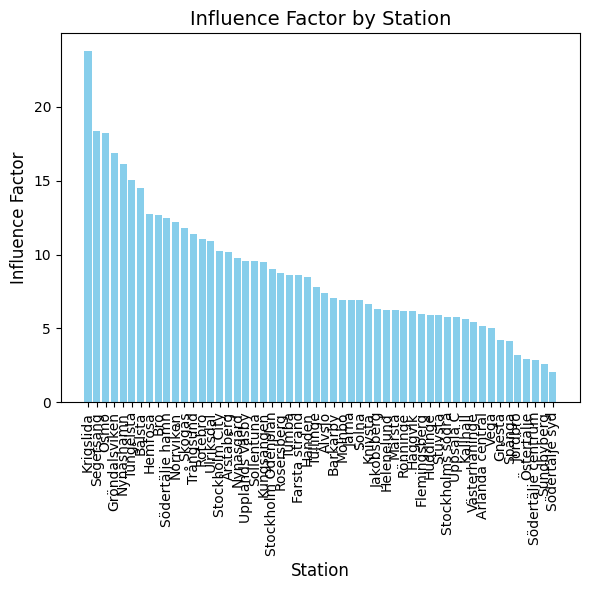

In [54]:
# 按影响度排序
df_k_sorted = df_k.sort_values(by='influence_received', ascending=False).reset_index(drop=True)

# 去掉站点名称前面的数字和下划线
df_k_sorted['station'] = df_k_sorted['station'].str.replace(r'^\d+_', '', regex=True)

# 绘制柱状图
plt.figure(figsize=(6, 6))
plt.bar(df_k_sorted['station'], df_k_sorted['influence_received'], color='skyblue')

# 添加标题和标签
plt.title('Influence Factor by Station', fontsize=14)
plt.xlabel('Station', fontsize=12)
plt.ylabel('Influence Factor', fontsize=12)

# plt.gca().axes.get_xaxis().set_visible(False)

# 旋转x轴标签，使其更易读
plt.xticks(rotation=90)

# 显示图表
plt.tight_layout()
plt.show()

还有什么能够参考到weight的复杂网络指标？？



节点指标表格:
              Node  In-degree  Out-degree  Betweenness      Hubs  Authorities  Clustering Coefficient
   Arlanda central          8           1     0.001814  0.001053     0.011288                0.500000
          Barkarby          8           2     0.000726  0.006325     0.018595                0.357143
               Bro         13           2     0.003266  0.011159     0.033164                0.307692
            Bålsta         15           1     0.000000  0.006050     0.064361                0.604396
     Farsta strand          7           7     0.006531  0.019526     0.027078                0.340659
      Flemingsberg          2           9     0.002177  0.025313     0.004038                0.436364
            Gnesta          3           1     0.000000  0.000002     0.000021                1.000000
     Gröndalsviken          2          16     0.000000  0.065171     0.017760                0.466667
            Handen          2          12     0.002177  0.032578     0.00

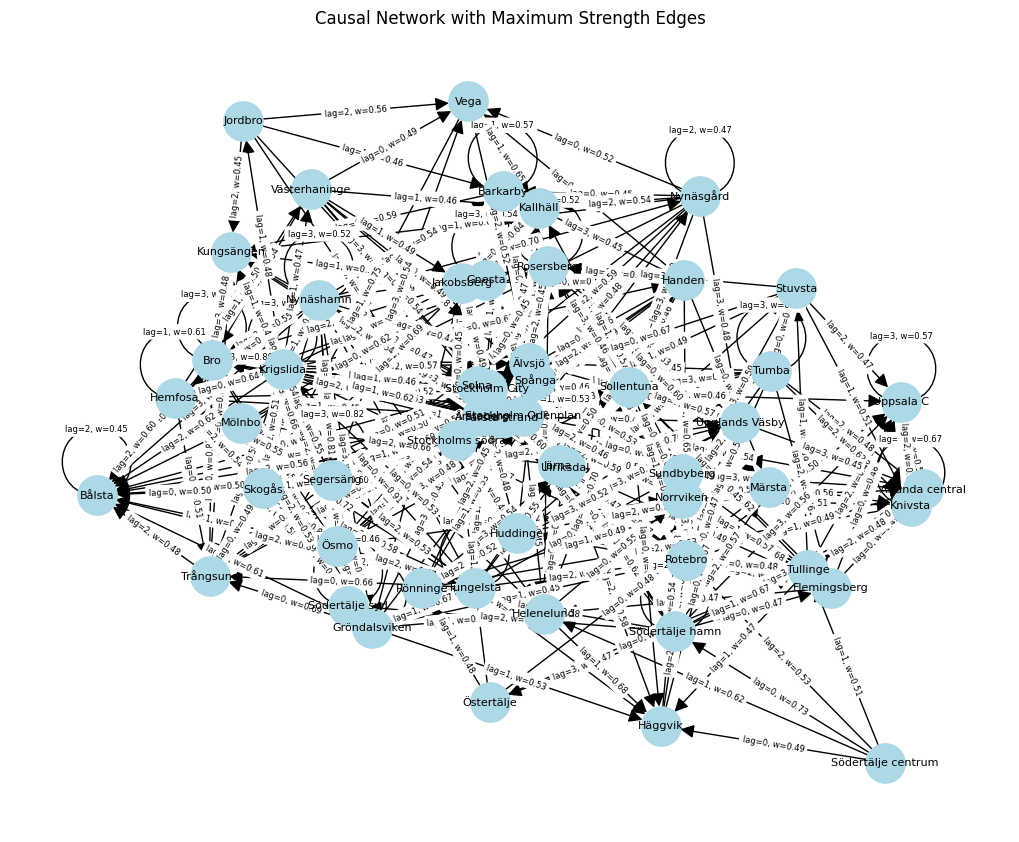

节点个数: 54
节点名称: ['Flemingsberg', 'Arlanda central', 'Norrviken', 'Rotebro', 'Stockholm Odenplan', 'Tullinge', 'Tumba', 'Ulriksdal', 'Upplands Väsby', 'Barkarby', 'Handen', 'Jordbro', 'Nynäsgård', 'Nynäshamn', 'Spånga', 'Stockholm City', 'Årstaberg', 'Bro', 'Gröndalsviken', 'Jakobsberg', 'Kungsängen', 'Sundbyberg', 'Trångsund', 'Västerhaninge', 'Älvsjö', 'Ösmo', 'Bålsta', 'Hemfosa', 'Krigslida', 'Segersäng', 'Skogås', 'Stockholms södra', 'Tungelsta', 'Farsta strand', 'Södertälje hamn', 'Gnesta', 'Järna', 'Mölnbo', 'Helenelund', 'Södertälje centrum', 'Huddinge', 'Rönninge', 'Häggvik', 'Sollentuna', 'Kallhäll', 'Vega', 'Knivsta', 'Stuvsta', 'Märsta', 'Rosersberg', 'Östertälje', 'Södertälje syd', 'Solna', 'Uppsala C']
边的个数: 332
显著关系计数: frozenset({'Södertälje syd', 'Gnesta', 'Mölnbo', 'Järna'})


In [55]:
# 计算网络指标
# 1. 入度和出度
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

# 2. 介数中心性
betweenness = nx.betweenness_centrality(G, weight='weight', normalized=True)

# 3. Hubs 和 Authorities
hits = nx.hits(G, max_iter=100, normalized=True)
hubs = hits[0]
authorities = hits[1]

# 4. 聚类系数
undirected_G = G.to_undirected()
clustering = nx.clustering(undirected_G)

# 5. 同配性系数
assort_in_in = nx.degree_assortativity_coefficient(G, x='in', y='in')
assort_in_out = nx.degree_assortativity_coefficient(G, x='in', y='out')
assort_out_in = nx.degree_assortativity_coefficient(G, x='out', y='in')
assort_out_out = nx.degree_assortativity_coefficient(G, x='out', y='out')

# 6. 网络效率
def network_efficiency(G):
    N = G.number_of_nodes()
    if N <= 1:
        return 0.0
    efficiency = 0.0
    for u in G.nodes():
        for v in G.nodes():
            if u != v:
                try:
                    # 使用 1/weight 作为距离，因为 weight 表示因果强度（越大越好）
                    length = nx.shortest_path_length(G, u, v, weight=lambda u, v, d: 1/d['weight'])
                    efficiency += 1.0 / length
                except nx.NetworkXNoPath:
                    efficiency += 0.0  # 无路径，效率为 0
    return efficiency / (N * (N - 1))

efficiency_edpn = network_efficiency(G)

# 7. 模块度
communities = greedy_modularity_communities(undirected_G)
modularity = nx.algorithms.community.modularity(undirected_G, communities)

# 8. 随机网络比较
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
n_random = 100  # 生成 100 个随机网络
random_efficiency = []
random_modularity = []
for _ in range(n_random):
    G_random = nx.gnm_random_graph(num_nodes, num_edges, directed=True)
    G_random = nx.DiGraph(G_random)  # 确保是有向图
    # 分配随机权重（模拟你的网络权重分布）
    weight_dist = [d['weight'] for u, v, d in G.edges(data=True)]
    for u, v in G_random.edges():
        G_random[u][v]['weight'] = np.random.choice(weight_dist)
    # 计算效率
    random_efficiency.append(network_efficiency(G_random))
    # 计算模块度
    G_random_undirected = G_random.to_undirected()
    random_communities = greedy_modularity_communities(G_random_undirected)
    random_modularity.append(nx.algorithms.community.modularity(G_random_undirected, random_communities))

efficiency_random_avg = np.mean(random_efficiency)
modularity_random_avg = np.mean(random_modularity)

# 构建节点指标表格
metrics = {
    'Node': variable_names,
    'In-degree': [in_degree.get(node, 0) for node in variable_names],
    'Out-degree': [out_degree.get(node, 0) for node in variable_names],
    'Betweenness': [betweenness.get(node, 0.0) for node in variable_names],
    'Hubs': [hubs.get(node, 0.0) for node in variable_names],
    'Authorities': [authorities.get(node, 0.0) for node in variable_names],
    'Clustering Coefficient': [clustering.get(node, 0.0) for node in variable_names]
}
df_metrics = pd.DataFrame(metrics)

random_assort = {
    'in_in': [], 'in_out': [], 'out_in': [], 'out_out': []
}
for _ in range(n_random):
    G_rand = nx.gnm_random_graph(num_nodes, num_edges, directed=True)
    for key, x, y in [('in_in', 'in', 'in'), ('in_out', 'in', 'out'), ('out_in', 'out', 'in'), ('out_out', 'out', 'out')]:
        val = nx.degree_assortativity_coefficient(G_rand, x=x, y=y)
        random_assort[key].append(val)


# 构建同配性表格
assort_metrics = {
    'Type': ['in-in', 'in-out', 'out-in', 'out-out'],
    'EDPN': [assort_in_in, assort_in_out, assort_out_in, assort_out_out],
    'Random_Avg': [np.mean(random_assort['in_in']), np.mean(random_assort['in_out']),
                   np.mean(random_assort['out_in']), np.mean(random_assort['out_out'])]
}
df_assort = pd.DataFrame(assort_metrics)

# 构建效率和模块度表格
global_metrics = {
    'Metric': ['Network Efficiency', 'Modularity'],
    'EDPN': [efficiency_edpn, modularity],
    'Random_Avg': [efficiency_random_avg, modularity_random_avg]
}
df_global = pd.DataFrame(global_metrics)

# 打印结果
print("\n节点指标表格:")
print(df_metrics.to_string(index=False))
print("\n同配性系数:")
print(df_assort.to_string(index=False))
print("\n全局指标（效率和模块度）:")
print(df_global.to_string(index=False))

# 保存到 Excel
output_file = "network_metrics_with_efficiency_modularity.xlsx"
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df_metrics.to_excel(writer, sheet_name='Node_Metrics', index=False)
    df_assort.to_excel(writer, sheet_name='Assortativity', index=False)
    df_global.to_excel(writer, sheet_name='Global_Metrics', index=False)

print(f"\n结果已保存到 {output_file}")

# 可视化
plt.figure(figsize=(10, 8))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', arrowsize=20, font_size=8)
edge_labels = {(u, v): f"lag={d['lag']}, w={d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)
plt.title("Causal Network with Maximum Strength Edges")
plt.show()

# 打印图信息
num_nodes = G.number_of_nodes()
print("节点个数:", num_nodes)
print("节点名称:", list(G.nodes()))
num_edges = G.number_of_edges()
print("边的个数:", num_edges)
print("显著关系计数:", c)

Triad Significance Profile (TSP):
003: -0.302
012: 0.397
102: -0.194
021D: -0.259
021U: -0.269
021C: 0.071
111D: -0.199
111U: -0.187
030T: 0.629
030C: -0.188
201: -0.067
120D: -0.134
120U: -0.135
120C: -0.140
210: -0.055
300: 0.000


<ipython-input-56-0f5d0bf623a3>:36: RuntimeWarning: invalid value encountered in divide
  z_scores = np.where(std_vector > 0, (real_vector - mean_vector) / std_vector, 0)


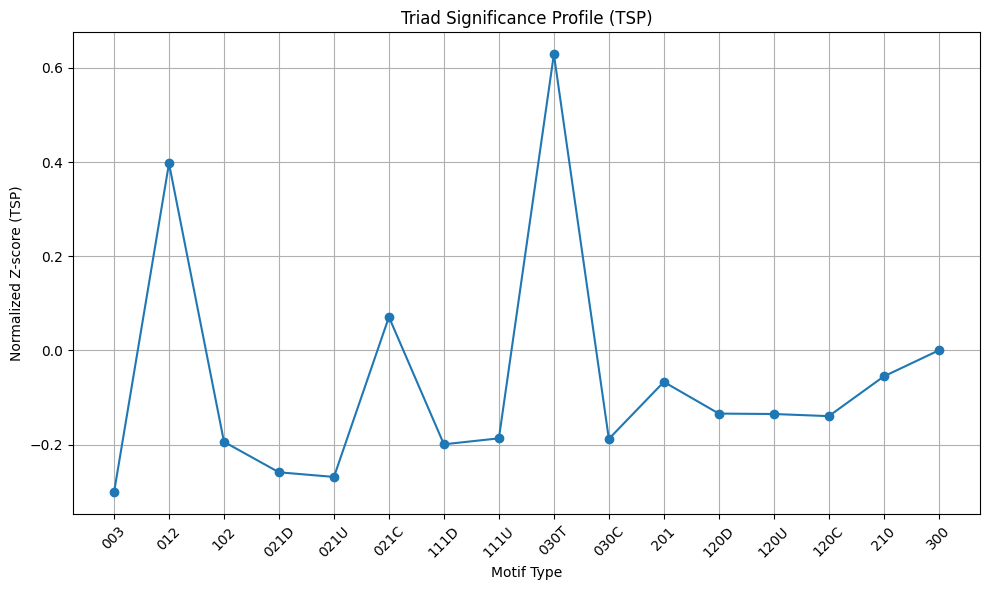

In [56]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import random
import copy
# --------------------
# Step 2: 计算真实网络 motif 出现次数
# --------------------
real_counts = nx.triadic_census(G)
motif_names = list(real_counts.keys())
real_vector = np.array([real_counts[m] for m in motif_names])

# --------------------
# Step 3: 构造随机网络并计算 motif 出现次数
# --------------------
n_random = 100
random_counts_list = []

for i in range(n_random):
    # 深拷贝网络
    G_random = copy.deepcopy(G)
    # 执行重连：degree-preserving randomization
    nx.directed_edge_swap(G_random, nswap=2 * G.number_of_edges(), max_tries=10000)
    # motif 统计
    counts = nx.triadic_census(G_random)
    vector = np.array([counts[m] for m in motif_names])
    random_counts_list.append(vector)

# --------------------
# Step 4: 计算均值、标准差和 Z-score
# --------------------
random_matrix = np.array(random_counts_list)
mean_vector = np.mean(random_matrix, axis=0)
std_vector = np.std(random_matrix, axis=0, ddof=1)  # 使用样本标准差
z_scores = np.where(std_vector > 0, (real_vector - mean_vector) / std_vector, 0)

# --------------------
# Step 5: 归一化 Z-score 得到 TSP
# --------------------
z_norm = z_scores / np.sqrt(np.sum(z_scores ** 2))

# --------------------
# Step 6: 输出并画图
# --------------------
print("Triad Significance Profile (TSP):")
for m, v in zip(motif_names, z_norm):
    print(f"{m}: {v:.3f}")

# 画图
plt.figure(figsize=(10, 6))
plt.plot(motif_names, z_norm, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel("Motif Type")
plt.ylabel("Normalized Z-score (TSP)")
plt.title("Triad Significance Profile (TSP)")
plt.grid(True)
plt.tight_layout()
plt.show()

三元组图已保存到 triad_graphs_fixed_triangle.png


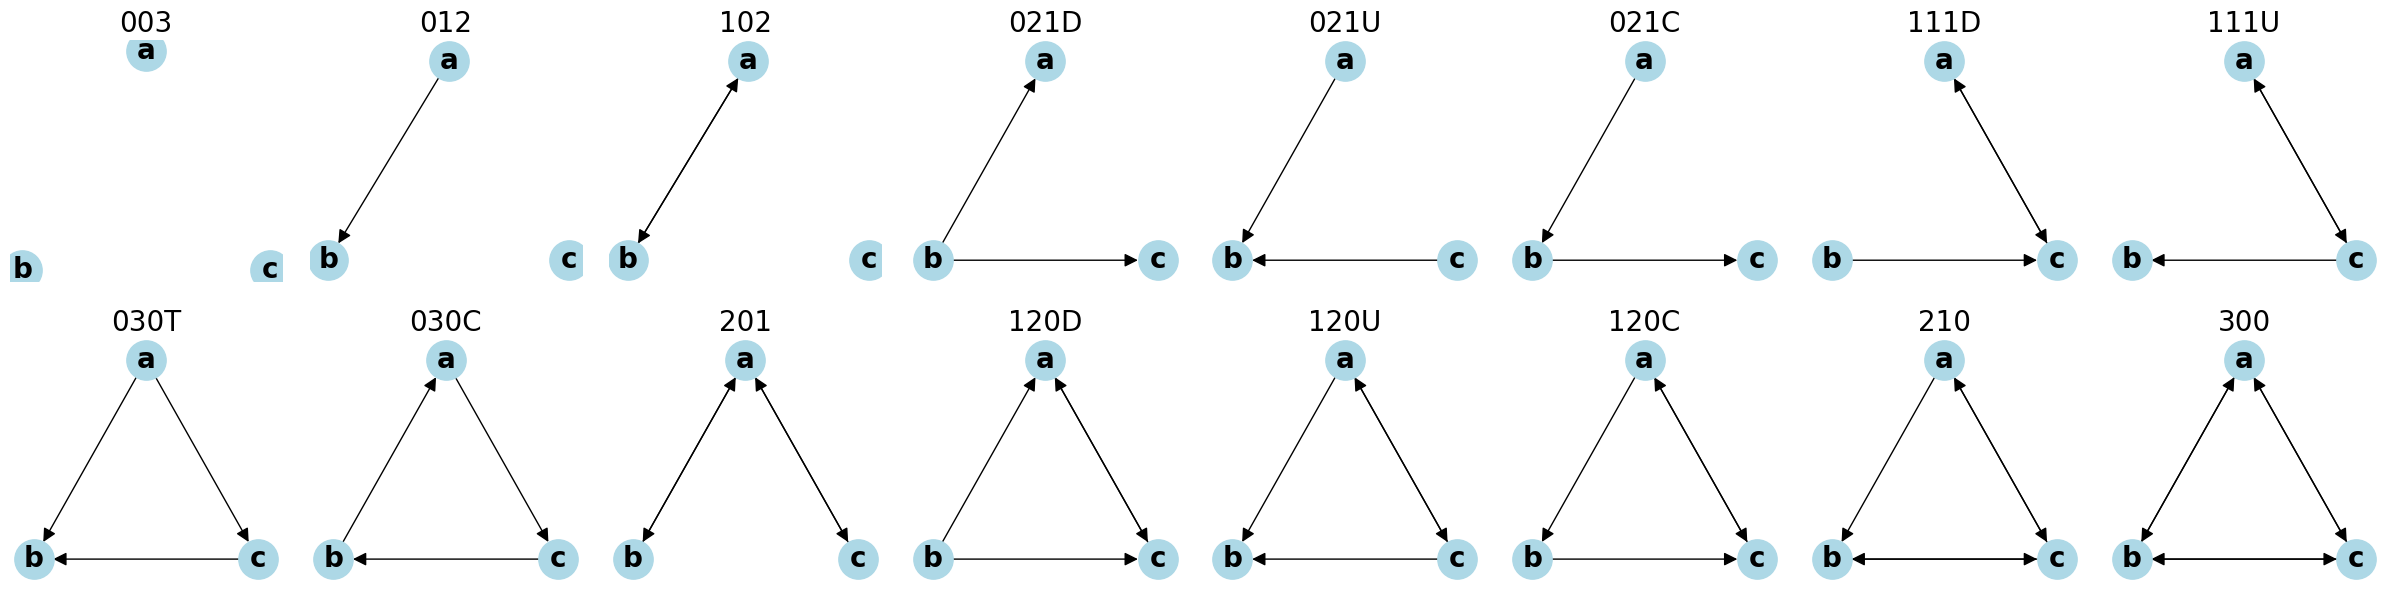

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 所有三元组类型
triad_types = ['003', '012', '102', '021D', '021U', '021C', '111D', '111U',
               '030T', '030C', '201', '120D', '120U', '120C', '210', '300']

# 定义等边三角形布局
scale = 0.5  # 缩放因子，边长从 1 变为 0.6
triangle_pos = {
    'a': (0, 1),                    # 顶点 A (顶部)
    'b': (-np.sqrt(3)/2, -0.5),     # 顶点 B (右下)
    'c': (np.sqrt(3)/2, -0.5)     # 顶点 C (左下)
}

# 创建 4x4 网格布局
fig, axes = plt.subplots(2, 8, figsize=(24, 6))
axes = axes.flatten()  # 展平为 1D 数组便于索引

# 为每种三元组生成图并绘制
for i, triad_name in enumerate(triad_types):
    # 生成三元组图
    G_triad = nx.triad_graph(triad_name)

    # 绘制
    nx.draw(G_triad, triangle_pos, ax=axes[i], with_labels=True, node_size=800,
            node_color='lightblue', arrowsize=20, font_size=20, font_weight='bold')
    axes[i].set_title(f"{triad_name}", fontsize=20)

# 调整布局
plt.tight_layout(h_pad=2, w_pad=2)

# 保存为 PNG
plt.savefig("triad_graphs_fixed_triangle.png", dpi=300, bbox_inches='tight')
print("三元组图已保存到 triad_graphs_fixed_triangle.png")

# 显示
plt.show()